Based on the use of the Fitness, predict the number of visitors to the Fitness, taking into account the influence of 
1.    Seasons
2.    Holidays
3.    The day of the week
4.    Gender
5.    Educational institution (Hanze vs. UG)
6.    Exam periods for the UG students.

# Install Library

In [161]:
#%pip install pandas matplotlib seaborn statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.8 MB 14.6 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 14.6 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 14.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Read CSV files

In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#cardholders
cardholderPath = r"./Cardholders" 

#get all CSV files in the folder
cardholderCSV = glob.glob(os.path.join(cardholderPath, "*.csv"))

#create empty list
dfs = []

# loop over the list of csv files
for f in cardholderCSV:

#	#read the csv file
	df = pd.read_csv(f)
	print(df.shape[0])
	dfs.append(df)

print(dfs)

#concat all csv into one dataframe
cardholderDF = pd.concat(dfs)
cardholderDF.columns = ["client_id", "male", "female", "card_type"]

# print the content
print('Cardholders:')
display(cardholderDF.head())
print(cardholderDF.info())
print(cardholderDF.describe())


13952
16523
984
1371
[       Klant nr Geslacht Man Geslacht vrouw         Omschrijving
0        206602          NaN          Vrouw  ACLO Card 2020-2021
1        220965          NaN          Vrouw  ACLO Card 2020-2021
2        221004          Man            NaN  ACLO Card 2020-2021
3        200011          Man            NaN  ACLO Card 2020-2021
4        187611          Man            NaN  ACLO Card 2020-2021
...         ...          ...            ...                  ...
13947    228038          Man            NaN  ACLO Card 2020-2021
13948    223099          NaN          Vrouw  ACLO Card 2020-2021
13949    207190          NaN          Vrouw  ACLO Card 2020-2021
13950    227282          NaN          Vrouw  ACLO Card 2020-2021
13951    210613          NaN          Vrouw  ACLO Card 2020-2021

[13952 rows x 4 columns],        Klant nr Geslacht Man Geslacht vrouw         Omschrijving
0        179077          Man            NaN  ACLO Card 2021-2022
1        186113          Man            N

,client_id,male,female,card_type
0,206602,NaN,Vrouw,ACLO Card 2020-2021
1,220965,NaN,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


<class 'pandas.core.frame.DataFrame'>
Index: 32830 entries, 0 to 1370
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  32830 non-null  int64 
 1   male       14903 non-null  object
 2   female     17119 non-null  object
 3   card_type  32830 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB
None
           client_id
count   32830.000000
mean   212305.477490
std     19069.354786
min     11117.000000
25%    203387.000000
50%    217945.000000
75%    225501.000000
max    235614.000000


In [5]:
#checkin times
checkinPath = r"./Check-in times"

#get all CSV files in the folder
checkinCSV = glob.glob(os.path.join(checkinPath, "*.csv"))

#create empty list
dfs = []

#loop over the list of csv files
for f in checkinCSV:

	#read the csv file
	df = pd.read_csv(f)
	#print(df.shape[0])
	dfs.append(df)

#concat all csv into one dataframe
checkinDF = pd.concat(dfs, ignore_index=True)

#print the content
print('Checkin Times:')
display(checkinDF.head())

#merge two Lid id together
print(checkinDF.info())
checkinDF.columns = ["client_id", "institution", "gender", "card_type", "checkin_time", "extra"]
checkinDF["institution"] = checkinDF["institution"].fillna(checkinDF["extra"])
checkinDF.drop(["extra"], axis=1, inplace=True)
checkinDF.reset_index(drop=True)

#print the content
print('After Removing Duplicated Columns:')
display(checkinDF.head())
print(checkinDF.info())
print(checkinDF.describe())

Checkin Times:


,Klant nr,Lid id,Geslacht,Abo bezoek,Incheckdatum,Lid id
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10,NaN
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,NaN
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,NaN
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,NaN
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Klant nr      380785 non-null  int64 
 1   Lid id        102827 non-null  object
 2   Geslacht      380785 non-null  object
 3   Abo bezoek    373011 non-null  object
 4   Incheckdatum  380785 non-null  object
 5   Lid id        253005 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.4+ MB
None
After Removing Duplicated Columns:


,client_id,institution,gender,card_type,checkin_time
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     380785 non-null  int64 
 1   institution   355832 non-null  object
 2   gender        380785 non-null  object
 3   card_type     373011 non-null  object
 4   checkin_time  380785 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.5+ MB
None
           client_id
count  380785.000000
mean   191590.238121
std     28360.215007
min        26.000000
25%    183541.000000
50%    196651.000000
75%    207474.000000
max    235293.000000


# EDA

## Card Holders

### Distribution by Gender

In [6]:
#gender
display(cardholderDF.head())

#combine gender column
cardholderDF["male"] = cardholderDF["male"].fillna(cardholderDF["female"])
display(cardholderDF.head())

,client_id,male,female,card_type
0,206602,NaN,Vrouw,ACLO Card 2020-2021
1,220965,NaN,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


,client_id,male,female,card_type
0,206602,Vrouw,Vrouw,ACLO Card 2020-2021
1,220965,Vrouw,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


In [7]:
#remove extra column
cardholderDF.drop(["female"], axis=1, inplace=True)

In [8]:
cardholderDF = cardholderDF.rename(columns={"male": "gender"}).reset_index(drop=True)
display(cardholderDF.head())
print(cardholderDF["gender"].value_counts())

,client_id,gender,card_type
0,206602,Vrouw,ACLO Card 2020-2021
1,220965,Vrouw,ACLO Card 2020-2021
2,221004,Man,ACLO Card 2020-2021
3,200011,Man,ACLO Card 2020-2021
4,187611,Man,ACLO Card 2020-2021


gender
Vrouw    17119
Man      14903
Name: count, dtype: int64


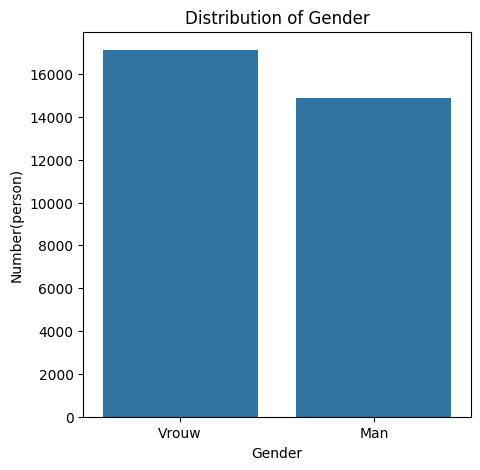

In [9]:
#Plot
plt.figure(figsize=(5,5))
plot = sns.countplot(data = cardholderDF, x = "gender")
plot.set_title("Distribution of Gender")
plot.set_xlabel("Gender")
plot.set_ylabel("Number(person)")


plt.show()

### Districution by type of card

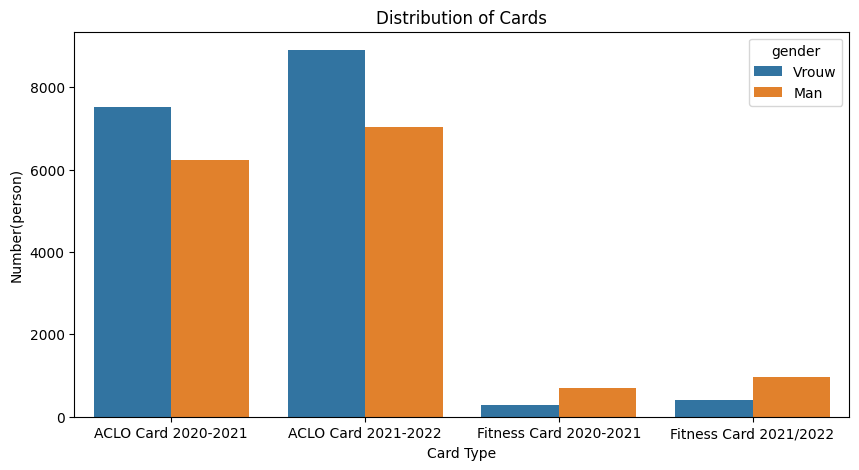

In [10]:
#type of cards
plt.figure(figsize=(10,5))
plot = sns.countplot(data = cardholderDF, x = "card_type", hue = "gender")
plot.set_title("Distribution of Cards")
plot.set_xlabel("Card Type")
plot.set_ylabel("Number(person)")

plt.show()

## Check In Times

### Fitness Usage by Education Institute

In [11]:
#check in times by education institute
print(checkinDF["institution"].unique())

['Medewerker RUG      ' 'RUG       ' nan 'Hanze       ' 'Hanze      '
 '         ' ' ' 'GORM' 'CRUGET' '     ' 'WIWI' 'GEEJ' '       ' 'ETGE'
 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' '   ' 'WITF' '  ' '      ' 'JEVA'
 'VALE' 'UIWI' 'VWIL' 'Hanze ' '    ' 'DUJMedewerker RUG' 'KAJA'
 'RUGCHanzeHanze' 'MEAD' '        ' 'RORA' 'Medewerker RUGARN' 'JEEU'
 'Medewerker RUG/Hanze        ' 'Medewerker RUG/Hanze          '
 'Medewerker RUG/Hanze           ' 'RUG           '
 'Medewerker RUG/Hanze       ' 'RUG             ' 'Hanze            '
 'RUG          ' 'RUG            ' 'Medewerker RUG/Hanze         '
 'Hanze              ' 'Hanze        ' 'Hanze             '
 'Hanze                ' 'Hanze         ' 'Hanze               '
 'Medewerker RUG/Hanze             ' 'RUG              '
 'Hanze           ' 'Hanze          ' 'RUG                '
 'RUG               ' 'Medewerker RUG/Hanze              '
 'Medewerker RUG/Hanze            ' 'RUG                 ' 'RUG         '
 'RUG        ' 'Han

In [12]:
#clean data
checkinDF["institution"] = checkinDF["institution"].str.strip()
checkinDF["institution"].dropna(inplace = True)
print(checkinDF["institution"].unique())

['Medewerker RUG' 'RUG' nan 'Hanze' '' 'GORM' 'CRUGET' 'WIWI' 'GEEJ'
 'ETGE' 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' 'WITF' 'JEVA' 'VALE'
 'UIWI' 'VWIL' 'DUJMedewerker RUG' 'KAJA' 'RUGCHanzeHanze' 'MEAD' 'RORA'
 'Medewerker RUGARN' 'JEEU' 'Medewerker RUG/Hanze'
 'MedewerkerRUG RUG/HanzeanzeARN' 'DUJMedewerkerRUG RUG/Hanzeanze' 'BNAN'
 'KILI' 'JENRUG' 'BONI' 'HanzeOHanzeO' 'VEHanzeW' 'VRJO' 'RUGAL_dili'
 'MORN' 'A.KoRUGter@rug.nl' 'TARI' 'Medewerkers RUG/Hanze'
 '- -        :  :' '-  -        :  :' 'DUJMedewerkers RUG/Hanze'
 '-1-1 00  00:00:00' 'Medewerkers RUG/HanzeARN' 'WACHanze'
 '-1-1900  00:00:00' 'KLEB' 'AJAA' 'RUGMEL' 'KRJN'
 'Medewerkers RUG/HanzeRWB' 'waya' 'DARA' 'CAWO'
 'ROBMedewerkers RUG/Hanze' 'ROBMedewerker RUG/Hanze'
 'DUJMedewerker RUG/Hanze' 'HanzeEMC' 'MEJJ' '-  -2       :  :'
 'Medewerker RUG/Hanze ARN' 'WERUGW' 'LEFI' 'KLMO' 'NAAU'
 'Medewerker RUG/Hanze OOM' 'Medewerker RUG/Hanze ELO' 'BORUGI' 'HanzeELE'
 'KAFA']


After confirming with the instructor, Data with values like MOOM, AJAA are actually the teacher's IDs from the schools. Hence, I decided to catogorize these data as "Medewerkers RUG/Hanze"

In [13]:
#remove unnecessary and find out all workers
wrongMask = ~checkinDF["institution"].str.contains("_|-|@", na=False)
workerMask = (~checkinDF["institution"].isin(["RUG", "Hanze"])) & (
    (checkinDF["institution"].str.len() == 4) | (checkinDF["institution"].str.contains("Medewerker|Hanze|RUG"))
)

checkinDF = checkinDF[wrongMask]

workerDF = checkinDF[workerMask]

instituteCount = workerDF["institution"].value_counts()
print(instituteCount.to_string())

institution
Medewerker RUG/Hanze              14848
Medewerker RUG                     9552
Medewerkers RUG/Hanze              9095
WIWI                                337
VWIL                                286
BONI                                231
ETGE                                217
GEEJ                                190
UIWI                                171
WITF                                164
RORA                                140
MEAD                                133
MORN                                 81
OLTI                                 63
DUJMedewerkers RUG/Hanze             60
DUJMedewerker RUG/Hanze              59
DROK                                 54
KILI                                 52
LEFI                                 47
HanzeEMC                             44
Medewerkers RUG/HanzeARN             43
CAWO                                 42
WACHanze                             37
KRJN                                 37
DUJMedewerker RUG           

C:\Users\watas\AppData\Local\Temp\ipykernel_90436\3147958940.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  workerDF = checkinDF[workerMask]


In [14]:
#make all workers into category Medewerker
checkinDF.loc[workerMask, "institution"] = "Medewerker RUG/Hanze"
print(checkinDF["institution"].unique())
print(checkinDF["institution"].value_counts())

['Medewerker RUG/Hanze' 'RUG' nan 'Hanze' '']
institution
RUG                     225749
Hanze                    84407
Medewerker RUG/Hanze     36428
                          6431
Name: count, dtype: int64


In [15]:
#remove the annoying ''
checkinDF["institution"].replace('', np.nan, inplace = True)
checkinDF["institution"].dropna(inplace = True)
print(checkinDF["institution"].value_counts())

C:\Users\watas\AppData\Local\Temp\ipykernel_90436\2216411085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  checkinDF["institution"].replace('', np.nan, inplace = True)


institution
RUG                     225749
Hanze                    84407
Medewerker RUG/Hanze     36428
Name: count, dtype: int64


In [16]:
probInstitute = checkinDF["institution"].value_counts() / checkinDF["institution"].value_counts().sum() * 100
probInstitute = pd.DataFrame(probInstitute)
probInstitute.columns = ["percentage"]
print(probInstitute)

                      percentage
institution                     
RUG                    65.135436
Hanze                  24.353981
Medewerker RUG/Hanze   10.510583


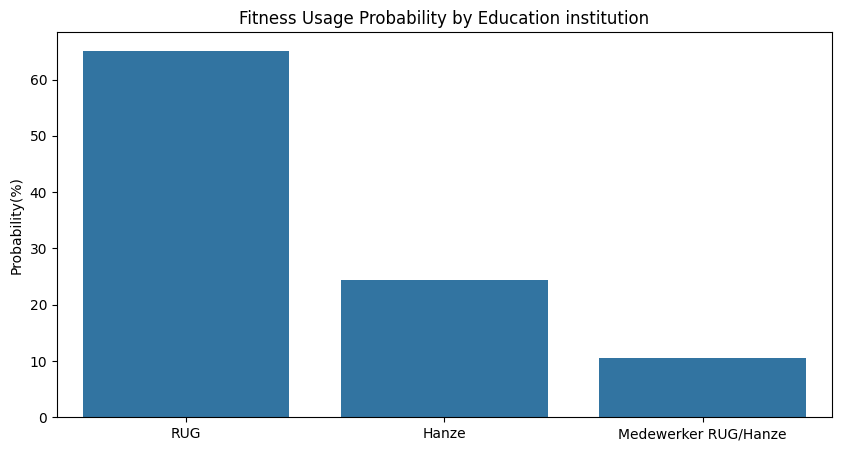

In [17]:
#Among all fitness usage history, the usage probability by education institution
plt.figure(figsize=(10,5))
plot = sns.barplot(data = probInstitute, x = probInstitute.index, y = "percentage")
plot.set_title("Fitness Usage Probability by Education institution")
plot.set_xlabel("")
plot.set_ylabel("Probability(%)")

plt.show()

### Fitness Usage by Gender

In [18]:
#check in times by gender

#remove fout(error) data
print(checkinDF["gender"].value_counts())
foutMask = checkinDF["gender"] == "fout"
checkinDF = checkinDF[~foutMask]  

print(f"After cleaning {checkinDF['gender'].value_counts()}")

gender
M       278983
V        82478
fout     16507
Name: count, dtype: int64
After cleaning gender
M    278983
V     82478
Name: count, dtype: int64


In [19]:
probGender = pd.DataFrame(checkinDF["gender"].value_counts() / checkinDF["gender"].value_counts().sum() * 100)
probGender.columns = ["percentage"]
display(probGender)

,percentage
gender,
M,77.182047
V,22.817953


C:\Users\watas\AppData\Local\Temp\ipykernel_90436\242538612.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(["Male", "Female"])


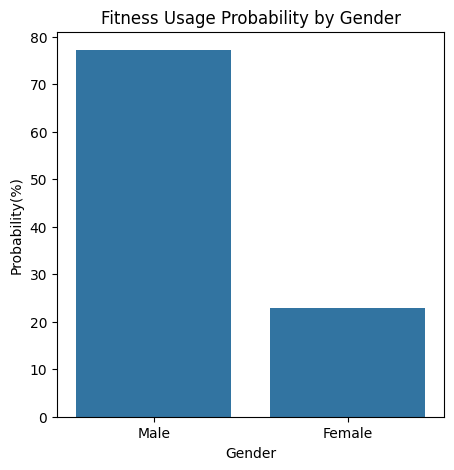

In [20]:
#among all fitness usage history, the usage probability by gender
plt.figure(figsize=(5,5))
plot = sns.barplot(data = probGender, x = probGender.index, y = "percentage")
plot.set_title("Fitness Usage Probability by Gender")
plot.set_xlabel("Gender")
plot.set_ylabel("Probability(%)")

plot.set_xticklabels(["Male", "Female"])

plt.show()

In [21]:
#among all fitness usage history, the usage probability by gender of each institution
probEduGender = checkinDF.groupby(["institution", "gender"]).size().reset_index(name = "frequency")
probEduGender["percentage"] = probEduGender["frequency"] / probEduGender["frequency"].sum() * 100
display(probEduGender)

,institution,gender,frequency,percentage
0,Hanze,M,62627,18.716192
1,Hanze,V,16390,4.898181
2,Medewerker RUG/Hanze,M,30208,9.027716
3,Medewerker RUG/Hanze,V,5861,1.751570
4,RUG,M,174029,52.008882
5,RUG,V,45499,13.597459


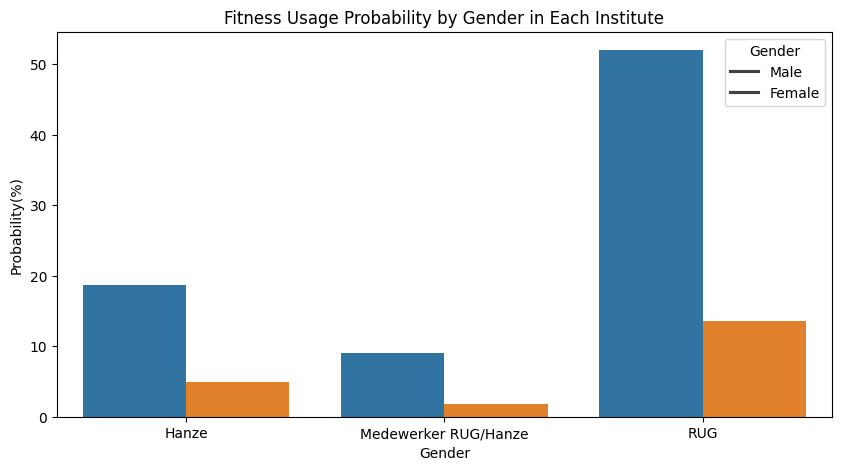

In [22]:
plt.figure(figsize=(10,5))
cEduGender = sns.barplot(data = probEduGender, x = "institution", y = "percentage", hue = "gender")
cEduGender.set_title("Fitness Usage Probability by Gender in Each Institute")
cEduGender.set_xlabel("Gender")
cEduGender.set_ylabel("Probability(%)")
cEduGender.legend(title = "Gender", labels = ["Male", "Female"])

plt.show()

### Fitness Usage by Card Type

In [23]:
numCard = checkinDF.groupby("card_type").size().reset_index(name = "usage")
display(numCard)

,card_type,usage
0,ACLO 1st semester Card 2021/2022,364
1,ACLO Card 2021-2022,3293
2,ACLO free Card 2021/2022,45
3,Fitness 'krachtwacht' 2018-2019,1737
4,Fitness 1st semester 2020-2021,1100
5,Fitness 1st semester 2021/2022,1761
6,Fitness 1st semester Card 18-19,3684
7,Fitness 1st semester Card 19-20,6278
8,Fitness 2nd semester 2020-2021,17
9,Fitness 2nd semester Card 18-19,11562


In [24]:
#fitness usage by each card type
numCard = numCard[numCard["card_type"].str.contains("ACLO Card|Fitness Card")]
display(numCard)

,card_type,usage
1,ACLO Card 2021-2022,3293
11,Fitness Card 2016-2017,3018
12,Fitness Card 2017-2018,83578
13,Fitness Card 2018-2019,74795
14,Fitness Card 2019-2020,65161
15,Fitness Card 2020-2021,14409
16,Fitness Card 2021/2022,11463


In [25]:
#total amount of card distributed
memberCard = cardholderDF.groupby("card_type").size().reset_index(name = "distributed")
display(memberCard)

,card_type,distributed
0,ACLO Card 2020-2021,13952
1,ACLO Card 2021-2022,16523
2,Fitness Card 2020-2021,984
3,Fitness Card 2021/2022,1371


In [26]:
allCard = memberCard.merge(numCard, how = "outer", on = "card_type")
allCard = allCard.fillna(0)

display(allCard)

,card_type,distributed,usage
0,ACLO Card 2020-2021,13952.0,0.0
1,ACLO Card 2021-2022,16523.0,3293.0
2,Fitness Card 2016-2017,0.0,3018.0
3,Fitness Card 2017-2018,0.0,83578.0
4,Fitness Card 2018-2019,0.0,74795.0
5,Fitness Card 2019-2020,0.0,65161.0
6,Fitness Card 2020-2021,984.0,14409.0
7,Fitness Card 2021/2022,1371.0,11463.0


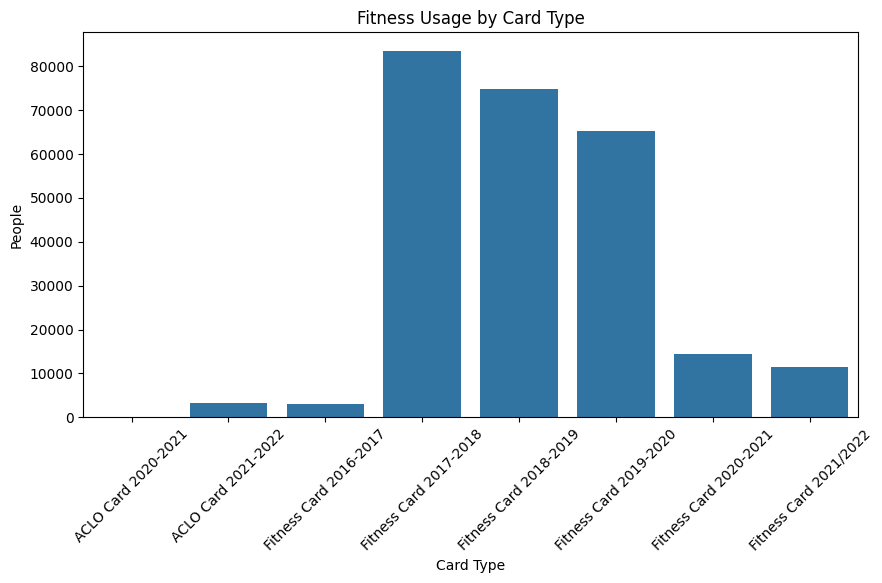

In [27]:
#plot
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allCard, x = "card_type", y = "usage")
plot.set_title("Fitness Usage by Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("People")
plt.xticks(rotation=45) #increase readability


plt.show()

After checking the overall number of the fitness usage, I would like to know how many unique users are using the fitness service by the card types.

In [28]:
#number of unique member for fitness usage by each card type
uniqueCardUsers = checkinDF.groupby("card_type")["client_id"].nunique().reset_index(name = "unique")
uniqueCardUsers = uniqueCardUsers[uniqueCardUsers["card_type"].str.contains("ACLO Card|Fitness Card")]

display(uniqueCardUsers)

,card_type,unique
1,ACLO Card 2021-2022,904
11,Fitness Card 2016-2017,465
12,Fitness Card 2017-2018,1622
13,Fitness Card 2018-2019,1591
14,Fitness Card 2019-2020,1594
15,Fitness Card 2020-2021,826
16,Fitness Card 2021/2022,1099


In [29]:
allCard = allCard.merge(uniqueCardUsers, how = "outer", on = "card_type")
allCard = allCard.fillna(0)

display(allCard)

,card_type,distributed,usage,unique
0,ACLO Card 2020-2021,13952.0,0.0,0.0
1,ACLO Card 2021-2022,16523.0,3293.0,904.0
2,Fitness Card 2016-2017,0.0,3018.0,465.0
3,Fitness Card 2017-2018,0.0,83578.0,1622.0
4,Fitness Card 2018-2019,0.0,74795.0,1591.0
5,Fitness Card 2019-2020,0.0,65161.0,1594.0
6,Fitness Card 2020-2021,984.0,14409.0,826.0
7,Fitness Card 2021/2022,1371.0,11463.0,1099.0


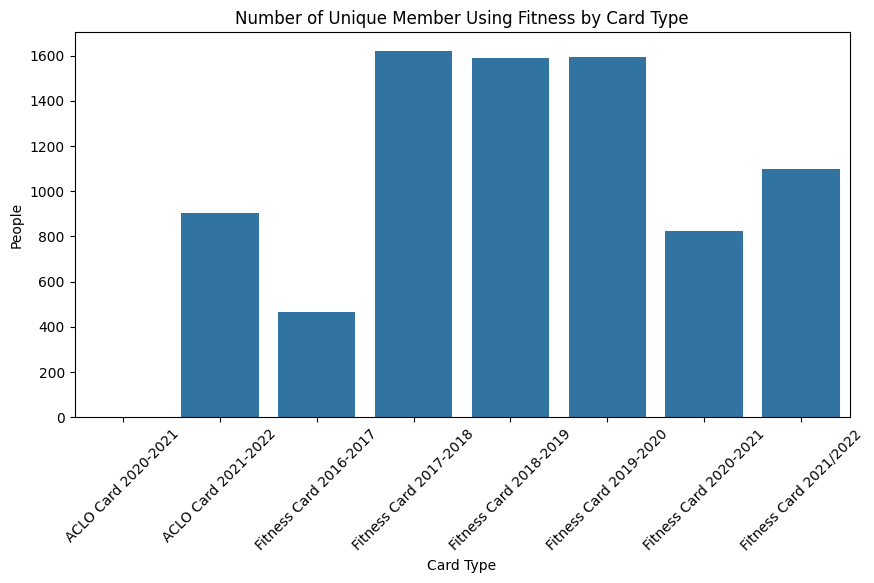

In [30]:
#among all card type, the number of unique member using fitness
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allCard, x = "card_type", y = "unique")
plot.set_title("Number of Unique Member Using Fitness by Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("People")
plt.xticks(rotation=45) #increase readability


plt.show()

As the previous Card Type distribution indicates, most people hold a regular ACLO card. 
So it might have the chance that the unique user of the regular card is higher due to its large distribution.

Hence, I decide to divide the number of unique users by the didtribution of the cards, to see the percentage of unique users instead of number.

However, since the distribution data is only 2020-2022, The following graph will only demenstrate the percentage of unique users between 2020-2022

In [31]:
allCard["unique_percentage"] = allCard.loc[allCard["distributed"] > 0, "unique"] / allCard["distributed"] * 100

display(allCard)

,card_type,distributed,usage,unique,unique_percentage
0,ACLO Card 2020-2021,13952.0,0.0,0.0,0.000000
1,ACLO Card 2021-2022,16523.0,3293.0,904.0,5.471161
2,Fitness Card 2016-2017,0.0,3018.0,465.0,NaN
3,Fitness Card 2017-2018,0.0,83578.0,1622.0,NaN
4,Fitness Card 2018-2019,0.0,74795.0,1591.0,NaN
5,Fitness Card 2019-2020,0.0,65161.0,1594.0,NaN
6,Fitness Card 2020-2021,984.0,14409.0,826.0,83.943089
7,Fitness Card 2021/2022,1371.0,11463.0,1099.0,80.160467


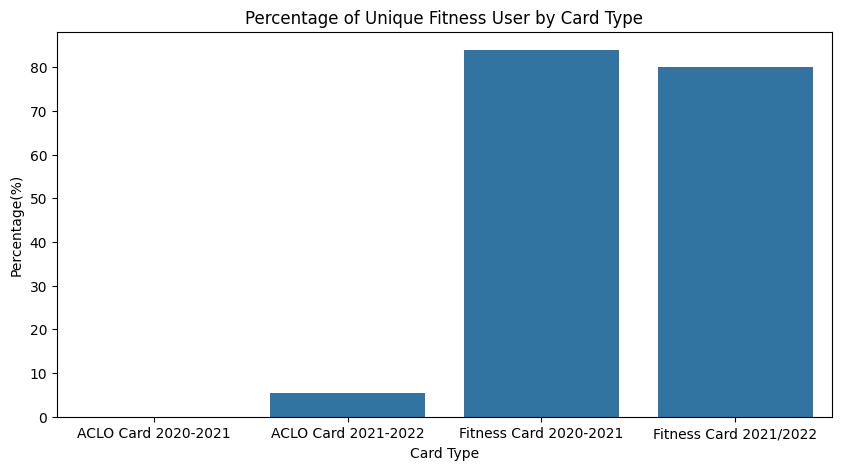

In [32]:
#among all card type, the fitness usage probability
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allCard[~allCard["unique_percentage"].isna()], x = "card_type", y = "unique_percentage")
plot.set_title("Percentage of Unique Fitness User by Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("Percentage(%)")


plt.show()

Finally, I want to check the average fitness usage of each user by the card types. To see if fitness cardholders tend to use more frequently.

In [33]:
allCard["per_member_usage"] = allCard["usage"] / allCard["unique"]

display(allCard)

,card_type,distributed,usage,unique,unique_percentage,per_member_usage
0,ACLO Card 2020-2021,13952.0,0.0,0.0,0.000000,NaN
1,ACLO Card 2021-2022,16523.0,3293.0,904.0,5.471161,3.642699
2,Fitness Card 2016-2017,0.0,3018.0,465.0,NaN,6.490323
3,Fitness Card 2017-2018,0.0,83578.0,1622.0,NaN,51.527744
4,Fitness Card 2018-2019,0.0,74795.0,1591.0,NaN,47.011314
5,Fitness Card 2019-2020,0.0,65161.0,1594.0,NaN,40.878921
6,Fitness Card 2020-2021,984.0,14409.0,826.0,83.943089,17.444310
7,Fitness Card 2021/2022,1371.0,11463.0,1099.0,80.160467,10.430391


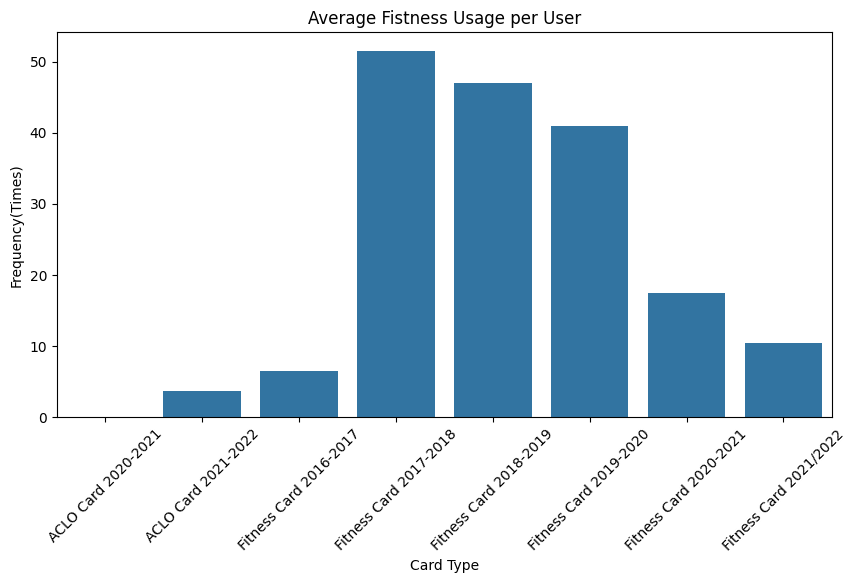

In [34]:
#among all card type, the average fitness usage frequency per user
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allCard, x = "card_type", y = "per_member_usage")
plot.set_title("Average Fistness Usage per User")
plot.set_xlabel("Card Type")
plot.set_ylabel("Frequency(Times)")
plt.xticks(rotation=45) #increase readability


plt.show()

### Fitness Usage by Card Types and Education Institute

In this part, I would like to see the distribution of cardtypes by each institution and their relating fitness usage.

In [35]:
#among the users from all school, the number of unique fitness users
eduCard = checkinDF[checkinDF["card_type"].str.contains("ACLO Card|Fitness Card", na = False)].\
    groupby(["institution", "card_type"])["client_id"].nunique().reset_index(name = "unique")

display(eduCard)

,institution,card_type,unique
0,Hanze,ACLO Card 2021-2022,224
1,Hanze,Fitness Card 2016-2017,83
2,Hanze,Fitness Card 2017-2018,344
3,Hanze,Fitness Card 2018-2019,363
4,Hanze,Fitness Card 2019-2020,403
5,Hanze,Fitness Card 2020-2021,214
6,Hanze,Fitness Card 2021/2022,311
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,87
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,165
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,20


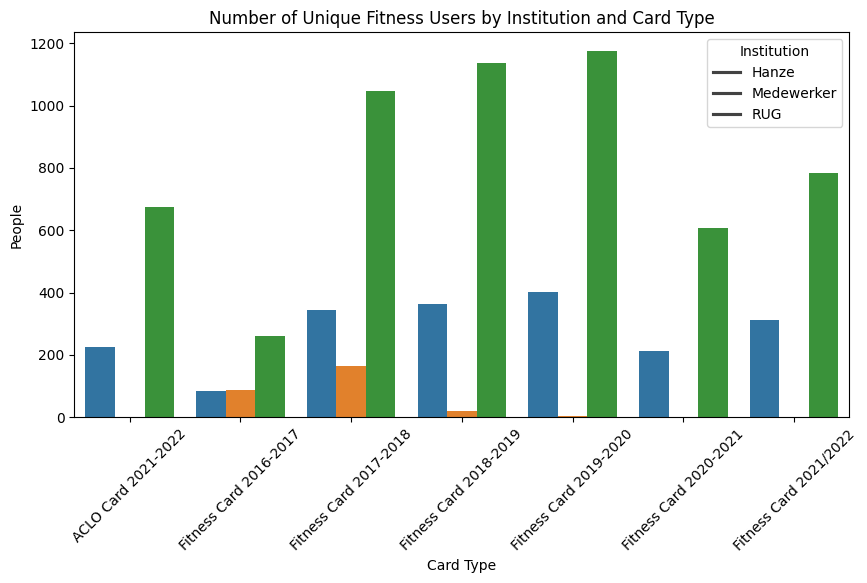

In [36]:
#plot
plt.figure(figsize=(10,5))
plot = sns.barplot(data = eduCard, x="card_type", y="unique", hue="institution")
plot.set_title("Number of Unique Fitness Users by Institution and Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("People")
plot.legend(title = "Institution", labels = ["Hanze", "Medewerker", "RUG"])
plt.xticks(rotation=45) #increase readability


plt.show()

In [37]:
#among the users of the schools, the how often they use the fitness service
numEduCard = checkinDF[checkinDF["card_type"].str.contains("ACLO Card|Fitness Card", na = False)].\
    groupby(["institution", "card_type"])["client_id"].size().reset_index(name = "usage")

display(numEduCard)

,institution,card_type,usage
0,Hanze,ACLO Card 2021-2022,810
1,Hanze,Fitness Card 2016-2017,630
2,Hanze,Fitness Card 2017-2018,19008
3,Hanze,Fitness Card 2018-2019,17033
4,Hanze,Fitness Card 2019-2020,16218
5,Hanze,Fitness Card 2020-2021,3600
6,Hanze,Fitness Card 2021/2022,2868
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,627
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,7915
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,1070


As the previous distribution graph indicates, RUG has most unique users, so there might have the chance that the fitness usage are higher due to the large number of users.

Hence, I decide to divide the frequency of fitness usage with the unique users of each school, to see the average usage per user.

In [38]:
allEduCard = eduCard.merge(numEduCard, on = ["institution", "card_type"])

display(allEduCard)

,institution,card_type,unique,usage
0,Hanze,ACLO Card 2021-2022,224,810
1,Hanze,Fitness Card 2016-2017,83,630
2,Hanze,Fitness Card 2017-2018,344,19008
3,Hanze,Fitness Card 2018-2019,363,17033
4,Hanze,Fitness Card 2019-2020,403,16218
5,Hanze,Fitness Card 2020-2021,214,3600
6,Hanze,Fitness Card 2021/2022,311,2868
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,87,627
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,165,7915
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,20,1070


In [39]:
allEduCard["per_member_usage"] = allEduCard["usage"] / allEduCard["unique"]

display(allEduCard)

,institution,card_type,unique,usage,per_member_usage
0,Hanze,ACLO Card 2021-2022,224,810,3.616071
1,Hanze,Fitness Card 2016-2017,83,630,7.590361
2,Hanze,Fitness Card 2017-2018,344,19008,55.255814
3,Hanze,Fitness Card 2018-2019,363,17033,46.922865
4,Hanze,Fitness Card 2019-2020,403,16218,40.243176
5,Hanze,Fitness Card 2020-2021,214,3600,16.822430
6,Hanze,Fitness Card 2021/2022,311,2868,9.221865
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,87,627,7.206897
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,165,7915,47.969697
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,20,1070,53.500000


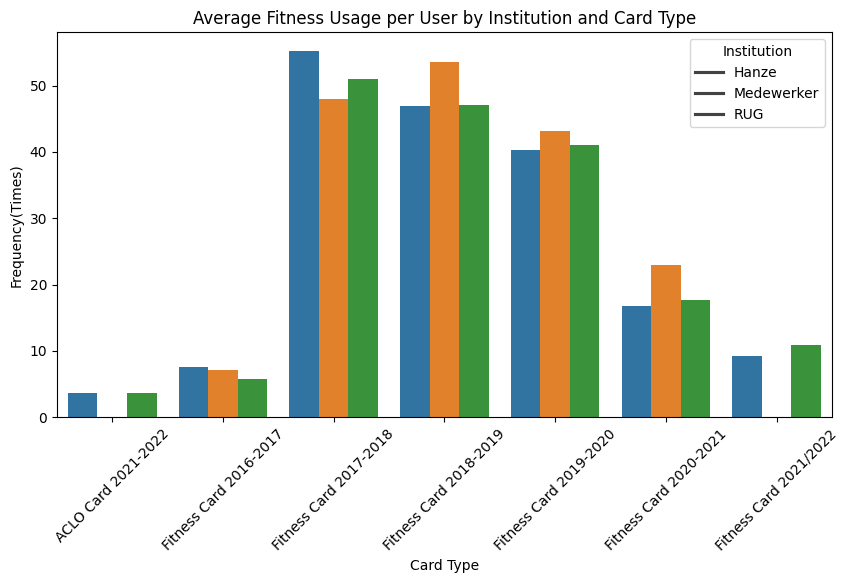

In [40]:
#plot
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allEduCard, x="card_type", y="per_member_usage", hue="institution")
plot.set_title("Average Fitness Usage per User by Institution and Card Type")
plot.set_xlabel("Card Type")
plot.set_ylabel("Frequency(Times)")
plot.legend(title = "Institution", labels = ["Hanze", "Medewerker", "RUG"])
plt.xticks(rotation=45) #increase readability


plt.show()

### Fitness Usage by Month

In [41]:
#Check in times by month

print(type(checkinDF.loc[0, "checkin_time"]))

<class 'str'>


In [42]:
#make string time into datetime
checkinDF["checkin_time"] = pd.to_datetime(checkinDF["checkin_time"])

#fetch out year and month
checkinDF["year"] = checkinDF["checkin_time"].dt.year
checkinDF["month"] = checkinDF["checkin_time"].dt.month_name()

display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August


In [43]:
#count frequency of month by each year
numMonth = checkinDF.groupby(['year', 'month']).size().reset_index(name='usage')

display(numMonth)

,year,month,usage
0,2017,August,4005
1,2017,December,7554
2,2017,November,10512
3,2017,October,11885
4,2017,September,8308
5,2018,April,9855
6,2018,August,2250
7,2018,December,7926
8,2018,February,11537
9,2018,January,8789


In [44]:
# Define the correct order of months
monthSort = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert "month_name" to categorical with ordered categories
numMonth["month"] = pd.Categorical(numMonth["month"], categories=monthSort, ordered=True)
display(numMonth)

,year,month,usage
0,2017,August,4005
1,2017,December,7554
2,2017,November,10512
3,2017,October,11885
4,2017,September,8308
5,2018,April,9855
6,2018,August,2250
7,2018,December,7926
8,2018,February,11537
9,2018,January,8789


In [45]:
#make month and year as the index and column of the table
medianMonth = numMonth.groupby("month")["usage"].median().reset_index(name = "median")

display(medianMonth)

C:\Users\watas\AppData\Local\Temp\ipykernel_90436\226077469.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianMonth = numMonth.groupby("month")["usage"].median().reset_index(name = "median")


,month,median
0,January,10876.0
1,February,11537.0
2,March,12335.0
3,April,9855.0
4,May,10543.0
5,June,6766.5
6,July,3222.5
7,August,2590.0
8,September,5703.0
9,October,11394.0


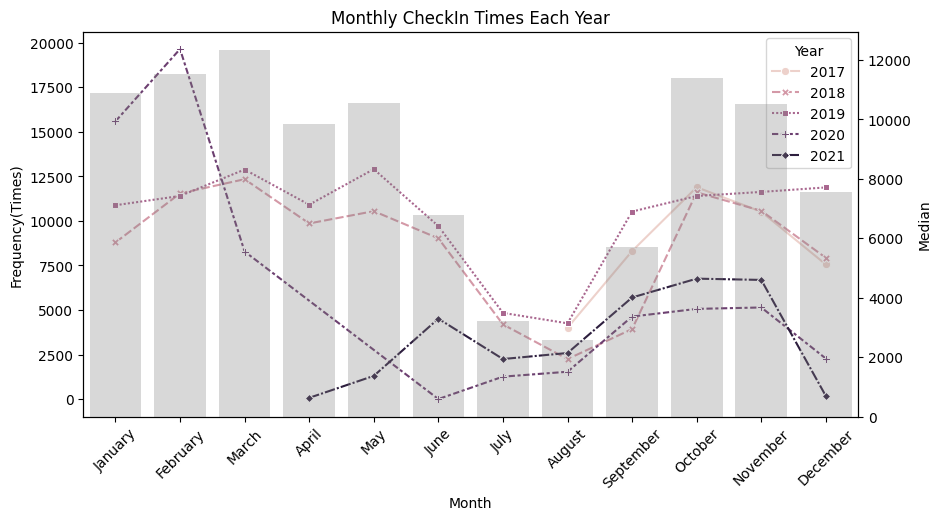

In [46]:
#seperate monthly checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
plot = sns.lineplot(data=numMonth, x="month", y="usage", hue="year", style="year", markers=True, ax=ax1)
plot.set_title("Monthly CheckIn Times Each Year")
plot.set_xlabel("Month")
plot.set_ylabel("Frequency(Times)")
plot.legend(title="Year")
plt.xticks(rotation=45) #increase readability

#Barchart for average chackin
ax2 = ax1.twinx()
statistic = sns.barplot(data=medianMonth, x="month", y="median", alpha=0.3, color='gray', ax=ax2)
statistic.set_ylabel("Median")

plt.show()

### Used Times by weekdays

In [47]:
#Check in times by weekdays

#Fetch weekdays
checkinDF["day"] = checkinDF["checkin_time"].dt.day_name()

display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday


In [48]:
#Count frequency of month by each year
numDay = checkinDF.groupby(['month', 'day']).size().reset_index(name='usage')


daySort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
numDay["day"] = pd.Categorical(numDay["day"], categories=daySort, ordered=True)
numDay["month"] = pd.Categorical(numDay["month"], categories=monthSort, ordered=True)

display(numDay)

,month,day,usage
0,April,Friday,2328
1,April,Monday,4903
2,April,Saturday,1457
3,April,Sunday,1586
4,April,Thursday,3015
...,...,...,...
79,September,Saturday,2775
80,September,Sunday,2504
81,September,Thursday,5259
82,September,Tuesday,5830


In [49]:
display(numDay.groupby(["month", "day"])["usage"].describe())

C:\Users\watas\AppData\Local\Temp\ipykernel_90436\3832988764.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(numDay.groupby(["month", "day"])["usage"].describe())


count    mean  std     min     25%     50%     75%     max
month    day                                                                  
January  Monday       1.0  6279.0  NaN  6279.0  6279.0  6279.0  6279.0  6279.0
         Tuesday      1.0  5820.0  NaN  5820.0  5820.0  5820.0  5820.0  5820.0
         Wednesday    1.0  6355.0  NaN  6355.0  6355.0  6355.0  6355.0  6355.0
         Thursday     1.0  5439.0  NaN  5439.0  5439.0  5439.0  5439.0  5439.0
         Friday       1.0  5347.0  NaN  5347.0  5347.0  5347.0  5347.0  5347.0
...                   ...     ...  ...     ...     ...     ...     ...     ...
December Wednesday    1.0  5054.0  NaN  5054.0  5054.0  5054.0  5054.0  5054.0
         Thursday     1.0  4562.0  NaN  4562.0  4562.0  4562.0  4562.0  4562.0
         Friday       1.0  4425.0  NaN  4425.0  4425.0  4425.0  4425.0  4425.0
         Saturday     1.0  2310.0  NaN  2310.0  2310.0  2310.0  2310.0  2310.0
         Sunday       1.0  2662.0  NaN  2662.0  2662.0  2662.0  2662.0  2662.0

[84 rows x 8 columns]

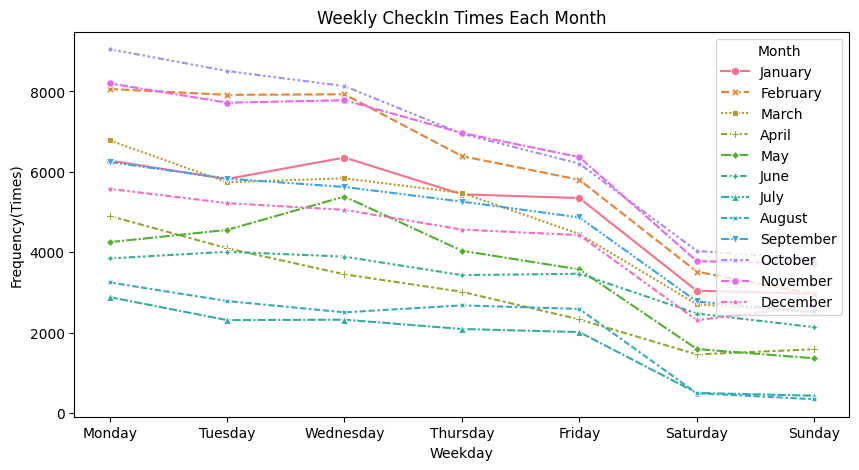

In [50]:
#Plot
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=numDay, x="day", y="usage", hue="month", style="month", markers=True)
plot.set_title("Weekly CheckIn Times Each Month")
plot.set_xlabel("Weekday")
plot.set_ylabel("Frequency(Times)")
plt.legend(title="Month")


plt.show()

### Used TImes by Season

In [51]:
#Check in times by season
def getSeason(month):
    if not isinstance(month, str):
        month = month.strftime('%B')
        
    if month in ("December", "January", "February"):
        return "Winter"
    elif month in ("March", "April", "May"):
        return "Spring"
    elif month in ("June", "July", "August"):
        return "Summer"
    else:
        return "Fall"

In [52]:
checkinDF["season"] = checkinDF["month"].apply(getSeason)
display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day,season
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer


In [53]:
#group season by year
numSeason = checkinDF.groupby(['year', 'season']).size().reset_index(name='usage')

seasonSort = ['Spring', 'Summer', 'Fall', 'Winter']
numSeason["season"] = pd.Categorical(numSeason["season"], categories=seasonSort, ordered=True)

display(numSeason)

,year,season,usage
0,2017,Fall,30705
1,2017,Summer,4005
2,2017,Winter,7554
3,2018,Fall,26094
4,2018,Spring,32733
5,2018,Summer,15462
6,2018,Winter,28252
7,2019,Fall,33539
8,2019,Spring,36681
9,2019,Summer,18800


In [54]:
display(numSeason.groupby(["year", "season"])["usage"].describe())

C:\Users\watas\AppData\Local\Temp\ipykernel_90436\338032277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(numSeason.groupby(["year", "season"])["usage"].describe())


count     mean  std      min      25%      50%      75%      max
year season                                                                  
2017 Summer    1.0   4005.0  NaN   4005.0   4005.0   4005.0   4005.0   4005.0
     Fall      1.0  30705.0  NaN  30705.0  30705.0  30705.0  30705.0  30705.0
     Winter    1.0   7554.0  NaN   7554.0   7554.0   7554.0   7554.0   7554.0
2018 Spring    1.0  32733.0  NaN  32733.0  32733.0  32733.0  32733.0  32733.0
     Summer    1.0  15462.0  NaN  15462.0  15462.0  15462.0  15462.0  15462.0
     Fall      1.0  26094.0  NaN  26094.0  26094.0  26094.0  26094.0  26094.0
     Winter    1.0  28252.0  NaN  28252.0  28252.0  28252.0  28252.0  28252.0
2019 Spring    1.0  36681.0  NaN  36681.0  36681.0  36681.0  36681.0  36681.0
     Summer    1.0  18800.0  NaN  18800.0  18800.0  18800.0  18800.0  18800.0
     Fall      1.0  33539.0  NaN  33539.0  33539.0  33539.0  33539.0  33539.0
     Winter    1.0  34146.0  NaN  34146.0  34146.0  34146.0  34146.0  34146.0
2020 Spring    1.0   8280.0  NaN   8280.0   8280.0   8280.0   8280.0   8280.0
     Summer    1.0   2811.0  NaN   2811.0   2811.0   2811.0   2811.0   2811.0
     Fall      1.0  14841.0  NaN  14841.0  14841.0  14841.0  14841.0  14841.0
     Winter    1.0  37492.0  NaN  37492.0  37492.0  37492.0  37492.0  37492.0
2021 Spring    1.0   1383.0  NaN   1383.0   1383.0   1383.0   1383.0   1383.0
     Summer    1.0   9356.0  NaN   9356.0   9356.0   9356.0   9356.0   9356.0
     Fall      1.0  19150.0  NaN  19150.0  19150.0  19150.0  19150.0  19150.0
     Winter    1.0    177.0  NaN    177.0    177.0    177.0    177.0    177.0

In [55]:
#make month and year as the index and column of the table
medianSeason = numSeason.groupby("season")["usage"].median().reset_index(name = "median")

display(medianSeason)

C:\Users\watas\AppData\Local\Temp\ipykernel_90436\949435678.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianSeason = numSeason.groupby("season")["usage"].median().reset_index(name = "median")


,season,median
0,Spring,20506.5
1,Summer,9356.0
2,Fall,26094.0
3,Winter,28252.0


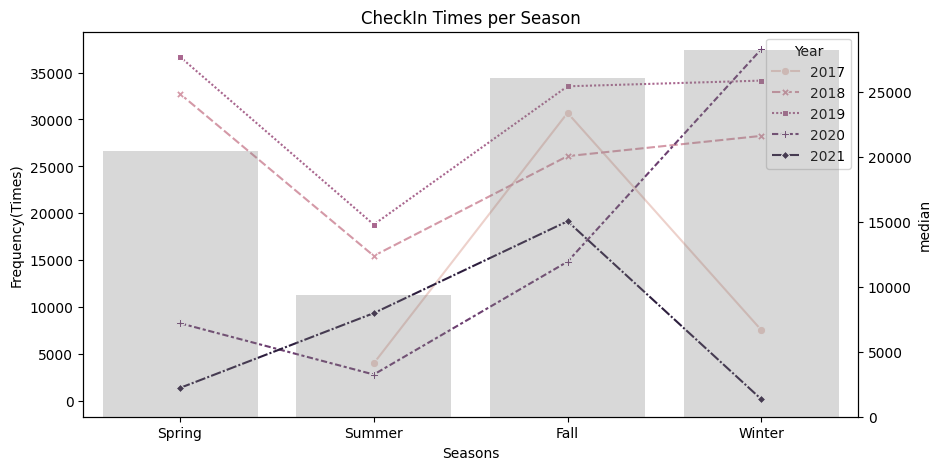

In [56]:
#seperated yearly season checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
plot = sns.lineplot(data=numSeason, x="season", y="usage", hue="year", style="year", markers=True, ax=ax1)
plot.set_title("CheckIn Times per Season")
plot.set_xlabel("Seasons")
plot.set_ylabel("Frequency(Times)")
plot.legend(title="Year")

#Barchart for average checkin
ax2 = ax1.twinx()
sns.barplot(x=medianSeason["season"], y=medianSeason["median"], alpha=0.3, color='gray', ax=ax2)

plt.show()

### Fitness Usage during Holiday

Since Hanze calendar is not accessable before 2023, I use RUG's calendar as both the holiday period and exam period

In [57]:
#check in time by holiday

#read calendar
calendar = pd.read_csv("./calendar.csv")
display(calendar.head())

,date,holiday,Exam,Lockdown
0,1/1/17,Christmas Break,0.0,0.0
1,1/2/17,Christmas Break,0.0,0.0
2,1/3/17,Christmas Break,0.0,0.0
3,1/4/17,Christmas Break,0.0,0.0
4,1/5/17,Christmas Break,0.0,0.0


In [58]:
print(type(calendar.loc[0, "date"]))

<class 'str'>


In [59]:
calendar["date"] = calendar["date"].apply(pd.to_datetime).apply(lambda x: x.date())
print(type(calendar.loc[0, "date"]))

<class 'datetime.date'>


In [60]:
#set date as index
calendar = calendar.set_index("date")
display(calendar.head())

,holiday,Exam,Lockdown
date,,,
2017-01-01,Christmas Break,0.0,0.0
2017-01-02,Christmas Break,0.0,0.0
2017-01-03,Christmas Break,0.0,0.0
2017-01-04,Christmas Break,0.0,0.0
2017-01-05,Christmas Break,0.0,0.0


In [61]:
numCalendar = calendar.groupby(["Lockdown", "holiday"]).size().reset_index(name='Frequency')
display(numCalendar)

,Lockdown,holiday,Frequency
0,0.0,Ascension Day,7
1,0.0,Christmas Break,86
2,0.0,Easter,20
3,0.0,Flexible Break,13
4,0.0,Kingsday,7
5,0.0,Liberation Day,7
6,0.0,Summer Vacation,326
7,0.0,Whit,12
8,1.0,Ascension Day,2
9,1.0,Christmas Break,26


In [62]:
def getHoliday(datetime):
    date = datetime.date()
    return calendar.loc[date, "holiday"]

In [63]:
#return holiday of the date, if not holiday then NaN
checkinDF["holiday"] = checkinDF["checkin_time"].apply(getHoliday)
display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day,season,holiday
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation


In [64]:
print(checkinDF["holiday"].value_counts())

holiday
Summer Vacation    19633
Christmas Break     4421
Flexible Break      1934
Easter              1088
Whit                 721
Ascension Day        489
Name: count, dtype: int64


In [65]:
#add if it's during Covid lockdown
def getCovid(datetime):
    date = datetime.date()
    return calendar.loc[date, "Lockdown"]

In [66]:
checkinDF["covid"] = checkinDF["checkin_time"].apply(getCovid)
display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day,season,holiday,covid
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation,0.0
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation,0.0
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation,0.0
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation,0.0
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation,0.0


In [67]:
#groupby covid and holiday
numHoliday = checkinDF.groupby(["covid", "holiday"]).size().reset_index(name='usage')

display(numHoliday)

,covid,holiday,usage
0,0.0,Ascension Day,487
1,0.0,Christmas Break,4421
2,0.0,Easter,1085
3,0.0,Flexible Break,1934
4,0.0,Summer Vacation,14859
5,0.0,Whit,721
6,1.0,Ascension Day,2
7,1.0,Easter,3
8,1.0,Summer Vacation,4774


Since Summer Vacation got more days in a year, it's pretty normal that it has the highest frequency.
Hence I decided to devide the usage during that holiday with the days of that holiday.

For instance, the total usage during Ascension Day without Covid is 487, there are a total of 7 Ascension Days without Covid. So the average daily usage during Ascension Day is 487 / 7

In [68]:
calHoliday = calendar.groupby(["Lockdown", "holiday"]).size().reset_index(name='days')

display(calHoliday)

,Lockdown,holiday,days
0,0.0,Ascension Day,7
1,0.0,Christmas Break,86
2,0.0,Easter,20
3,0.0,Flexible Break,13
4,0.0,Kingsday,7
5,0.0,Liberation Day,7
6,0.0,Summer Vacation,326
7,0.0,Whit,12
8,1.0,Ascension Day,2
9,1.0,Christmas Break,26


In [69]:
allHoliday = calHoliday.merge(numHoliday, how = "left", left_on = ["Lockdown", "holiday"], right_on = ["covid", "holiday"])

display(allHoliday)

,Lockdown,holiday,days,covid,usage
0,0.0,Ascension Day,7,0.0,487.0
1,0.0,Christmas Break,86,0.0,4421.0
2,0.0,Easter,20,0.0,1085.0
3,0.0,Flexible Break,13,0.0,1934.0
4,0.0,Kingsday,7,NaN,NaN
5,0.0,Liberation Day,7,NaN,NaN
6,0.0,Summer Vacation,326,0.0,14859.0
7,0.0,Whit,12,0.0,721.0
8,1.0,Ascension Day,2,1.0,2.0
9,1.0,Christmas Break,26,NaN,NaN


In [70]:
allHoliday["usage"] = allHoliday["usage"].fillna(0)
display(allHoliday)

,Lockdown,holiday,days,covid,usage
0,0.0,Ascension Day,7,0.0,487.0
1,0.0,Christmas Break,86,0.0,4421.0
2,0.0,Easter,20,0.0,1085.0
3,0.0,Flexible Break,13,0.0,1934.0
4,0.0,Kingsday,7,NaN,0.0
5,0.0,Liberation Day,7,NaN,0.0
6,0.0,Summer Vacation,326,0.0,14859.0
7,0.0,Whit,12,0.0,721.0
8,1.0,Ascension Day,2,1.0,2.0
9,1.0,Christmas Break,26,NaN,0.0


In [71]:
allHoliday["average_usage"] = allHoliday["usage"] / allHoliday["days"]
display(allHoliday)

,Lockdown,holiday,days,covid,usage,average_usage
0,0.0,Ascension Day,7,0.0,487.0,69.571429
1,0.0,Christmas Break,86,0.0,4421.0,51.406977
2,0.0,Easter,20,0.0,1085.0,54.250000
3,0.0,Flexible Break,13,0.0,1934.0,148.769231
4,0.0,Kingsday,7,NaN,0.0,0.000000
5,0.0,Liberation Day,7,NaN,0.0,0.000000
6,0.0,Summer Vacation,326,0.0,14859.0,45.579755
7,0.0,Whit,12,0.0,721.0,60.083333
8,1.0,Ascension Day,2,1.0,2.0,1.000000
9,1.0,Christmas Break,26,NaN,0.0,0.000000


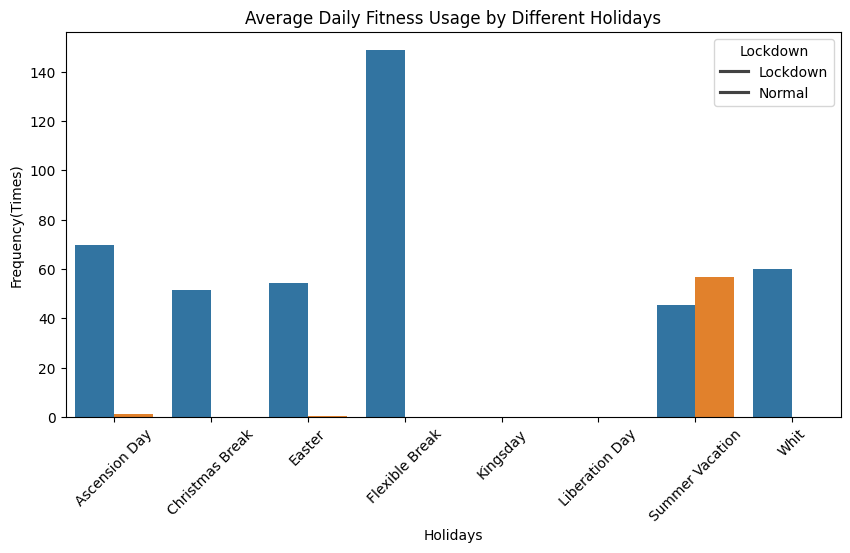

In [72]:
#plot
plt.figure(figsize=(10,5))
plot = sns.barplot(data = allHoliday, x="holiday", y="average_usage", hue="Lockdown")
plot.set_title("Average Daily Fitness Usage by Different Holidays")
plot.set_xlabel("Holidays")
plot.set_ylabel("Frequency(Times)")
plot.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])
plt.xticks(rotation = 45)


plt.show()

In [73]:
holidayDF = checkinDF[["holiday", "covid"]]

In [74]:
holidayDF.loc[~(holidayDF["holiday"].isna()), "holiday"] = 1
holidayDF.loc[holidayDF["holiday"].isna(), "holiday"] = 0
display(holidayDF.head())

,holiday,covid
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


In [75]:
print(holidayDF["holiday"].value_counts())

holiday
0    333175
1     28286
Name: count, dtype: int64


The same goes with workday, since most days in a year are not holiday, I decided to devide the usage during that holiday with the days of that holiday, to see the average daily usage during workdays and holidays

In [76]:
calendarHoliday = calendar[["holiday", "Lockdown"]]

calendarHoliday.loc[~(calendarHoliday["holiday"].isna()), "holiday"] = 1
calendarHoliday.loc[calendarHoliday["holiday"].isna(), "holiday"] = 0
display(calendarHoliday.head())

,holiday,Lockdown
date,,
2017-01-01,1,0.0
2017-01-02,1,0.0
2017-01-03,1,0.0
2017-01-04,1,0.0
2017-01-05,1,0.0


In [77]:
holiday = holidayDF.groupby(["covid", "holiday"]).size().reset_index(name='usage')
calHoliday = calendarHoliday.groupby(["Lockdown", "holiday"]).size().reset_index(name='days')
display(holiday)
display(calHoliday)

,covid,holiday,usage
0,0.0,0,307285
1,0.0,1,23507
2,1.0,0,25890
3,1.0,1,4779


,Lockdown,holiday,days
0,0.0,0,2020
1,0.0,1,478
2,1.0,0,510
3,1.0,1,126


In [78]:
allCovid = calHoliday.merge(holiday, how = "left", left_on = ["Lockdown", "holiday"], right_on = ["covid", "holiday"])

display(allCovid)

,Lockdown,holiday,days,covid,usage
0,0.0,0,2020,0.0,307285
1,0.0,1,478,0.0,23507
2,1.0,0,510,1.0,25890
3,1.0,1,126,1.0,4779


In [79]:
allCovid["average_usage"] = allCovid["usage"] / allCovid["days"]
display(allCovid)

,Lockdown,holiday,days,covid,usage,average_usage
0,0.0,0,2020,0.0,307285,152.121287
1,0.0,1,478,0.0,23507,49.177824
2,1.0,0,510,1.0,25890,50.764706
3,1.0,1,126,1.0,4779,37.928571


C:\Users\watas\AppData\Local\Temp\ipykernel_90436\3886615067.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  day.set_xticklabels(dayType)


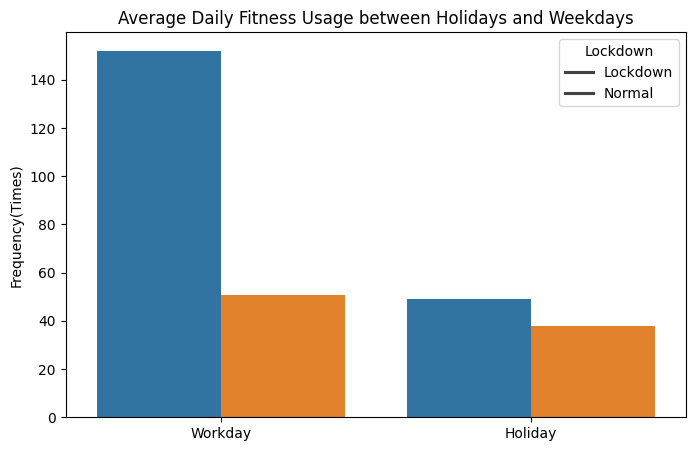

In [80]:
#plot
plt.figure(figsize=(8,5))
day = sns.barplot(data = allCovid, x="holiday", y="average_usage", hue="Lockdown")
day.set_title("Average Daily Fitness Usage between Holidays and Weekdays")
day.set_xlabel("")
day.set_ylabel("Frequency(Times)")
day.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])

dayType = ["Workday", "Holiday"]
day.set_xticklabels(dayType)


plt.show()

### Used Times during Exam Period

In [81]:
#check in time during exam
def getExam(datetime):
    date = datetime.date()
    return calendar.loc[date, "Exam"]

In [82]:
checkinDF["exam"] = checkinDF["checkin_time"].apply(getExam)
display(checkinDF.head())

,client_id,institution,gender,card_type,checkin_time,year,month,day,season,holiday,covid,exam
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0


In [83]:
#normalized exam and normal school day
numExam = checkinDF[checkinDF["holiday"].isna()].groupby(["covid", "exam"]).size().reset_index(name = "usage")
display(numExam)

,covid,exam,usage
0,0.0,0.0,238095
1,0.0,1.0,69190
2,1.0,0.0,17885
3,1.0,1.0,8005


In [84]:
calExam = calendar[calendar["holiday"].isna()].groupby(["Lockdown", "Exam"]).size().reset_index(name = "days")
display(calExam)

,Lockdown,Exam,days
0,0.0,0.0,1497
1,0.0,1.0,523
2,1.0,0.0,349
3,1.0,1.0,161


In [85]:
allExam = calExam.merge(numExam, how = "left", left_on = ["Lockdown", "Exam"], right_on = ["covid", "exam"])

allExam["average_usage"] = allExam["usage"] / allExam["days"]
display(allExam)

,Lockdown,Exam,days,covid,exam,usage,average_usage
0,0.0,0.0,1497,0.0,0.0,238095,159.048096
1,0.0,1.0,523,0.0,1.0,69190,132.294455
2,1.0,0.0,349,1.0,0.0,17885,51.246418
3,1.0,1.0,161,1.0,1.0,8005,49.720497


C:\Users\watas\AppData\Local\Temp\ipykernel_90436\3737982097.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  exam.set_xticklabels(examType)


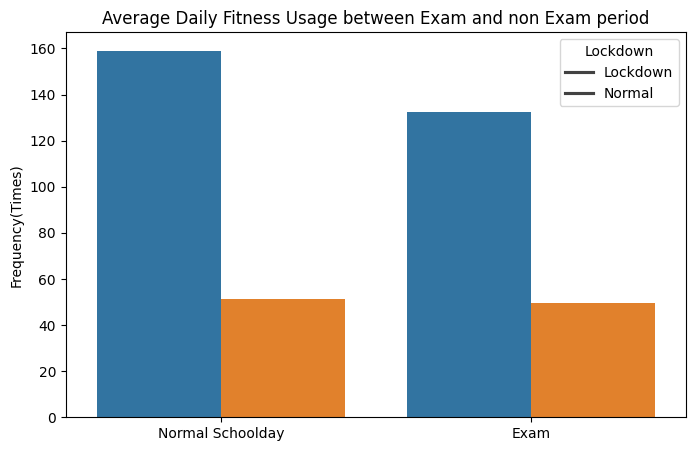

In [86]:
#plot
plt.figure(figsize=(8,5))
exam = sns.barplot(data = allExam, x="exam", y="average_usage", hue="Lockdown")
exam.set_title("Average Daily Fitness Usage between Exam and non Exam period")
exam.set_xlabel("")
exam.set_ylabel("Frequency(Times)")
exam.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])

examType = ["Normal Schoolday", "Exam"]
exam.set_xticklabels(examType)


plt.show()

### Used Times by Weather

In [87]:
#load the weather data

# Data Preparation

## Create Input Dataset

In [307]:
#create input dataset
byDateDF = checkinDF.groupby(checkinDF["checkin_time"].dt.date).size().reset_index(name = "usage")
byDateDF = byDateDF.sort_values("checkin_time")
display(byDateDF)

,checkin_time,usage
0,2017-08-01,170
1,2017-08-02,141
2,2017-08-03,151
3,2017-08-04,157
4,2017-08-07,183
...,...,...
1260,2021-11-27,180
1261,2021-11-28,151
1262,2021-11-29,184
1263,2021-11-30,194


In [308]:
print(type(byDateDF["checkin_time"][0]))

<class 'datetime.date'>


In [309]:
calendar.index = pd.to_datetime(calendar.index).date
completeDate = calendar[(calendar.index > pd.to_datetime("2017-07-31").date()) &\
                         (calendar.index < pd.to_datetime("2022-01-01").date())]
display(completeDate)

,holiday,Exam,Lockdown
2017-08-01,Summer Vacation,0.0,0.0
2017-08-02,Summer Vacation,0.0,0.0
2017-08-03,Summer Vacation,0.0,0.0
2017-08-04,Summer Vacation,0.0,0.0
2017-08-05,Summer Vacation,0.0,0.0
...,...,...,...
2021-12-27,Christmas Break,0.0,1.0
2021-12-28,Christmas Break,0.0,1.0
2021-12-29,Christmas Break,0.0,1.0
2021-12-30,Christmas Break,0.0,1.0


In [310]:
completeDate.loc[completeDate["holiday"].isna(), "holiday"] = "None"

display(completeDate)

,holiday,Exam,Lockdown
2017-08-01,Summer Vacation,0.0,0.0
2017-08-02,Summer Vacation,0.0,0.0
2017-08-03,Summer Vacation,0.0,0.0
2017-08-04,Summer Vacation,0.0,0.0
2017-08-05,Summer Vacation,0.0,0.0
...,...,...,...
2021-12-27,Christmas Break,0.0,1.0
2021-12-28,Christmas Break,0.0,1.0
2021-12-29,Christmas Break,0.0,1.0
2021-12-30,Christmas Break,0.0,1.0


In [311]:
datas = byDateDF.merge(completeDate, how = "right", left_on="checkin_time", right_on=completeDate.index)
datas = datas.fillna(0)
display(datas)

,checkin_time,usage,holiday,Exam,Lockdown
0,2017-08-01,170.0,Summer Vacation,0.0,0.0
1,2017-08-02,141.0,Summer Vacation,0.0,0.0
2,2017-08-03,151.0,Summer Vacation,0.0,0.0
3,2017-08-04,157.0,Summer Vacation,0.0,0.0
4,2017-08-05,0.0,Summer Vacation,0.0,0.0
...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0
1610,2021-12-28,0.0,Christmas Break,0.0,1.0
1611,2021-12-29,0.0,Christmas Break,0.0,1.0
1612,2021-12-30,0.0,Christmas Break,0.0,1.0


In [312]:
datas["season"] = datas["checkin_time"].apply(getSeason)

display(datas)

,checkin_time,usage,holiday,Exam,Lockdown,season
0,2017-08-01,170.0,Summer Vacation,0.0,0.0,Summer
1,2017-08-02,141.0,Summer Vacation,0.0,0.0,Summer
2,2017-08-03,151.0,Summer Vacation,0.0,0.0,Summer
3,2017-08-04,157.0,Summer Vacation,0.0,0.0,Summer
4,2017-08-05,0.0,Summer Vacation,0.0,0.0,Summer
...,...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0,Winter
1610,2021-12-28,0.0,Christmas Break,0.0,1.0,Winter
1611,2021-12-29,0.0,Christmas Break,0.0,1.0,Winter
1612,2021-12-30,0.0,Christmas Break,0.0,1.0,Winter


In [313]:
datas = datas.rename(columns={"Exam": "exam", "Lockdown": "covid"}).reset_index(drop=True)
display(datas)

,checkin_time,usage,holiday,exam,covid,season
0,2017-08-01,170.0,Summer Vacation,0.0,0.0,Summer
1,2017-08-02,141.0,Summer Vacation,0.0,0.0,Summer
2,2017-08-03,151.0,Summer Vacation,0.0,0.0,Summer
3,2017-08-04,157.0,Summer Vacation,0.0,0.0,Summer
4,2017-08-05,0.0,Summer Vacation,0.0,0.0,Summer
...,...,...,...,...,...,...
1609,2021-12-27,0.0,Christmas Break,0.0,1.0,Winter
1610,2021-12-28,0.0,Christmas Break,0.0,1.0,Winter
1611,2021-12-29,0.0,Christmas Break,0.0,1.0,Winter
1612,2021-12-30,0.0,Christmas Break,0.0,1.0,Winter


In [314]:
#whether user from each institution go to fitness on that date
bySchool = checkinDF.groupby([checkinDF["checkin_time"].dt.date, "institution"]).size().unstack(fill_value=0)

#convert counts to boolean (True if > 0, else False)
bySchool = bySchool > 0

#reset index to keep date as a column
bySchool = bySchool.reset_index()

display(bySchool)


institution,checkin_time,Hanze,Medewerker RUG/Hanze,RUG
0,2017-08-01,True,True,True
1,2017-08-02,True,True,True
2,2017-08-03,True,True,True
3,2017-08-04,True,True,True
4,2017-08-07,True,True,True
...,...,...,...,...
1260,2021-11-27,True,True,True
1261,2021-11-28,True,True,True
1262,2021-11-29,True,True,True
1263,2021-11-30,True,True,True


In [315]:
datas = bySchool.merge(datas, how = "right", on="checkin_time")
display(datas)

,checkin_time,Hanze,Medewerker RUG/Hanze,RUG,usage,holiday,exam,covid,season
0,2017-08-01,True,True,True,170.0,Summer Vacation,0.0,0.0,Summer
1,2017-08-02,True,True,True,141.0,Summer Vacation,0.0,0.0,Summer
2,2017-08-03,True,True,True,151.0,Summer Vacation,0.0,0.0,Summer
3,2017-08-04,True,True,True,157.0,Summer Vacation,0.0,0.0,Summer
4,2017-08-05,NaN,NaN,NaN,0.0,Summer Vacation,0.0,0.0,Summer
...,...,...,...,...,...,...,...,...,...
1609,2021-12-27,NaN,NaN,NaN,0.0,Christmas Break,0.0,1.0,Winter
1610,2021-12-28,NaN,NaN,NaN,0.0,Christmas Break,0.0,1.0,Winter
1611,2021-12-29,NaN,NaN,NaN,0.0,Christmas Break,0.0,1.0,Winter
1612,2021-12-30,NaN,NaN,NaN,0.0,Christmas Break,0.0,1.0,Winter


In [316]:
datas = datas.fillna(False)
display(datas)

C:\Users\watas\AppData\Local\Temp\ipykernel_90436\2820120581.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datas = datas.fillna(False)


,checkin_time,Hanze,Medewerker RUG/Hanze,RUG,usage,holiday,exam,covid,season
0,2017-08-01,True,True,True,170.0,Summer Vacation,0.0,0.0,Summer
1,2017-08-02,True,True,True,141.0,Summer Vacation,0.0,0.0,Summer
2,2017-08-03,True,True,True,151.0,Summer Vacation,0.0,0.0,Summer
3,2017-08-04,True,True,True,157.0,Summer Vacation,0.0,0.0,Summer
4,2017-08-05,False,False,False,0.0,Summer Vacation,0.0,0.0,Summer
...,...,...,...,...,...,...,...,...,...
1609,2021-12-27,False,False,False,0.0,Christmas Break,0.0,1.0,Winter
1610,2021-12-28,False,False,False,0.0,Christmas Break,0.0,1.0,Winter
1611,2021-12-29,False,False,False,0.0,Christmas Break,0.0,1.0,Winter
1612,2021-12-30,False,False,False,0.0,Christmas Break,0.0,1.0,Winter


In [317]:
datas["day"] = pd.to_datetime(datas["checkin_time"]).dt.day_name()
display(datas)

,checkin_time,Hanze,Medewerker RUG/Hanze,RUG,usage,holiday,exam,covid,season,day
0,2017-08-01,True,True,True,170.0,Summer Vacation,0.0,0.0,Summer,Tuesday
1,2017-08-02,True,True,True,141.0,Summer Vacation,0.0,0.0,Summer,Wednesday
2,2017-08-03,True,True,True,151.0,Summer Vacation,0.0,0.0,Summer,Thursday
3,2017-08-04,True,True,True,157.0,Summer Vacation,0.0,0.0,Summer,Friday
4,2017-08-05,False,False,False,0.0,Summer Vacation,0.0,0.0,Summer,Saturday
...,...,...,...,...,...,...,...,...,...,...
1609,2021-12-27,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Monday
1610,2021-12-28,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Tuesday
1611,2021-12-29,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Wednesday
1612,2021-12-30,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Thursday


In [318]:
byGender = checkinDF.groupby([pd.to_datetime(checkinDF["checkin_time"]).dt.date, "gender"]).size().unstack(fill_value=0)

# Convert counts to boolean (True if > 0, else False)
byGender = byGender > 0

# Reset index to keep date as a column
byGender = byGender.reset_index()

display(byGender)

gender,checkin_time,M,V
0,2017-08-01,True,True
1,2017-08-02,True,True
2,2017-08-03,True,True
3,2017-08-04,True,True
4,2017-08-07,True,True
...,...,...,...
1260,2021-11-27,True,True
1261,2021-11-28,True,True
1262,2021-11-29,True,True
1263,2021-11-30,True,True


In [319]:
datas = byGender.merge(datas, how = "right", on="checkin_time")
display(datas)

,checkin_time,M,V,Hanze,Medewerker RUG/Hanze,RUG,usage,holiday,exam,covid,season,day
0,2017-08-01,True,True,True,True,True,170.0,Summer Vacation,0.0,0.0,Summer,Tuesday
1,2017-08-02,True,True,True,True,True,141.0,Summer Vacation,0.0,0.0,Summer,Wednesday
2,2017-08-03,True,True,True,True,True,151.0,Summer Vacation,0.0,0.0,Summer,Thursday
3,2017-08-04,True,True,True,True,True,157.0,Summer Vacation,0.0,0.0,Summer,Friday
4,2017-08-05,NaN,NaN,False,False,False,0.0,Summer Vacation,0.0,0.0,Summer,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
1609,2021-12-27,NaN,NaN,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Monday
1610,2021-12-28,NaN,NaN,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Tuesday
1611,2021-12-29,NaN,NaN,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Wednesday
1612,2021-12-30,NaN,NaN,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Thursday


In [320]:
datas = datas.set_index("checkin_time")
display(datas)

,M,V,Hanze,Medewerker RUG/Hanze,RUG,usage,holiday,exam,covid,season,day
checkin_time,,,,,,,,,,,
2017-08-01,True,True,True,True,True,170.0,Summer Vacation,0.0,0.0,Summer,Tuesday
2017-08-02,True,True,True,True,True,141.0,Summer Vacation,0.0,0.0,Summer,Wednesday
2017-08-03,True,True,True,True,True,151.0,Summer Vacation,0.0,0.0,Summer,Thursday
2017-08-04,True,True,True,True,True,157.0,Summer Vacation,0.0,0.0,Summer,Friday
2017-08-05,NaN,NaN,False,False,False,0.0,Summer Vacation,0.0,0.0,Summer,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,NaN,NaN,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Monday
2021-12-28,NaN,NaN,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Tuesday
2021-12-29,NaN,NaN,False,False,False,0.0,Christmas Break,0.0,1.0,Winter,Wednesday


## Tokenize

In [321]:
from sklearn.preprocessing import LabelEncoder
encoded_classes = []
encoder = LabelEncoder()

column = ['usage', 'M', 'V', 'Hanze', 'Medewerker RUG/Hanze', 'RUG', 'holiday', 'exam', 'covid', 'season', 'day']

for col in column:
    datas[col] = encoder.fit_transform(datas[col])
    encoded_classes.append(encoder.classes_)

datas.head(20)

,M,V,Hanze,Medewerker RUG/Hanze,RUG,usage,holiday,exam,covid,season,day
checkin_time,,,,,,,,,,,
2017-08-01,1,1,1,1,1,145,7,0,0,2,5
2017-08-02,1,1,1,1,1,118,7,0,0,2,6
2017-08-03,1,1,1,1,1,128,7,0,0,2,4
2017-08-04,1,1,1,1,1,133,7,0,0,2,0
2017-08-05,2,2,0,0,0,0,7,0,0,2,2
2017-08-06,2,2,0,0,0,0,7,0,0,2,3
2017-08-07,1,1,1,1,1,158,7,0,0,2,1
2017-08-08,1,1,1,1,1,118,7,0,0,2,5
2017-08-09,1,1,1,1,1,131,7,0,0,2,6


## Correlation Matrix

Chi-squared is sensitive to sample size, therefore I decided to apply Cramer's V to check for correlation between predictors, since the latter normalizes for sample size, providing a more consistent measure of association strength.

In [ ]:
from itertools import product
import scipy.stats as ss

In [264]:
predictor = ['M', 'V', 'Hanze', 'Medewerker RUG/Hanze', 'RUG', 'holiday', 'exam', 'covid', 'season', 'day']
target = ['usage']

#create all possible combinations
predictors = list(product(predictor,predictor, repeat = 1))
print(predictors)

pairs = list(product(predictor,target, repeat = 1))
print(pairs)

[('M', 'M'), ('M', 'V'), ('M', 'Hanze'), ('M', 'Medewerker RUG/Hanze'), ('M', 'RUG'), ('M', 'holiday'), ('M', 'exam'), ('M', 'covid'), ('M', 'season'), ('M', 'day'), ('V', 'M'), ('V', 'V'), ('V', 'Hanze'), ('V', 'Medewerker RUG/Hanze'), ('V', 'RUG'), ('V', 'holiday'), ('V', 'exam'), ('V', 'covid'), ('V', 'season'), ('V', 'day'), ('Hanze', 'M'), ('Hanze', 'V'), ('Hanze', 'Hanze'), ('Hanze', 'Medewerker RUG/Hanze'), ('Hanze', 'RUG'), ('Hanze', 'holiday'), ('Hanze', 'exam'), ('Hanze', 'covid'), ('Hanze', 'season'), ('Hanze', 'day'), ('Medewerker RUG/Hanze', 'M'), ('Medewerker RUG/Hanze', 'V'), ('Medewerker RUG/Hanze', 'Hanze'), ('Medewerker RUG/Hanze', 'Medewerker RUG/Hanze'), ('Medewerker RUG/Hanze', 'RUG'), ('Medewerker RUG/Hanze', 'holiday'), ('Medewerker RUG/Hanze', 'exam'), ('Medewerker RUG/Hanze', 'covid'), ('Medewerker RUG/Hanze', 'season'), ('Medewerker RUG/Hanze', 'day'), ('RUG', 'M'), ('RUG', 'V'), ('RUG', 'Hanze'), ('RUG', 'Medewerker RUG/Hanze'), ('RUG', 'RUG'), ('RUG', 'holid

In [265]:
#define Carmer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y) 
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    denominator = min((kcorr-1), (rcorr-1))
    if denominator <= 0:
        return 0
    else:
        return np.sqrt(phi2corr / denominator)

In [266]:
result = []

for x1, x2 in predictors:
    cramersv = cramers_v(datas[x1], datas[x2])
    result.append((x1,x2,cramersv))

print(result)

[('M', 'M', np.float64(1.0)), ('M', 'V', np.float64(0.7066708568136462)), ('M', 'Hanze', np.float64(0.9888607268326957)), ('M', 'Medewerker RUG/Hanze', np.float64(0.974801362660459)), ('M', 'RUG', np.float64(0.9996897781839419)), ('M', 'holiday', np.float64(0.13413078321309463)), ('M', 'exam', np.float64(0.0)), ('M', 'covid', np.float64(0.5508755354190819)), ('M', 'season', np.float64(0.2529663263361265)), ('M', 'day', np.float64(0.10911238045988539)), ('V', 'M', np.float64(0.7066708568136462)), ('V', 'V', np.float64(1.0)), ('V', 'Hanze', np.float64(0.990246309968152)), ('V', 'Medewerker RUG/Hanze', np.float64(0.9832477401595626)), ('V', 'RUG', np.float64(0.9996897781839419)), ('V', 'holiday', np.float64(0.1627695703159622)), ('V', 'exam', np.float64(0.0)), ('V', 'covid', np.float64(0.5671467315484624)), ('V', 'season', np.float64(0.2698973189121976)), ('V', 'day', np.float64(0.1116364736453387)), ('Hanze', 'M', np.float64(0.9888607268326957)), ('Hanze', 'V', np.float64(0.9902463099681

In [267]:
resultOutput = pd.DataFrame(result, columns = ["var1", "var2", "corr"])

## Using pivot function to convert the above DataFrame into a crosstab
resultPivot = resultOutput.pivot(index="var1", columns="var2", values="corr")

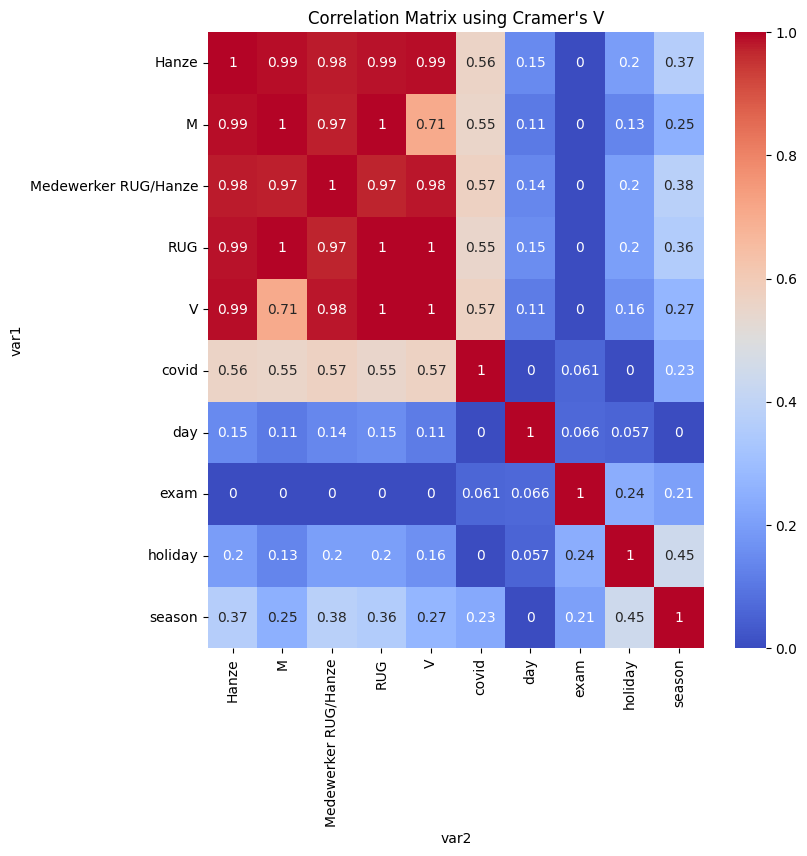

In [268]:
#plot into heatmap
plt.figure(figsize=(8,8))
plot = sns.heatmap(resultPivot, annot = True, cmap='coolwarm')
plot.set_title("Correlation Matrix using Cramer's V")
plt.show()

### DAG

In [88]:
# Initialize a directed graph
dag = nx.DiGraph()

# Add nodes (features)
features = ["Gender", "Education Institute", "Date", "Season", "Month", "Weekday", "Holiday", "Exam", "Covid", "numFitness"]
dag.add_nodes_from(features)

# Define the relationships between features (edges)
edges = [
    ("Gender", "numFitness"),
    ("Education Institute", "numFitness"),
    ("Card Type", "numFitness"),
    ("Season", "numFitness"),
    ("Month", "numFitness"),
    ("Weekday", "numFitness"),
    ("Holiday", "numFitness"),
    ("Exam", "numFitness"),
    ("Covid", "numFitness"),
    ("Covid", "Holiday"),
    ("Covid", "Exam"),
    ("Date", "Month"),
    ("Month", "Season"),
    ("Date", "Season"),
    ("Date", "Weekday"),
    ("Date", "Holiday"),
    ("Date", "Exam"),
]

dag.add_edges_from(edges)

In [ ]:
# Visualize the DAG
#plt.figure(figsize=(10, 8))
#pos = nx.spring_layout(dag, iterations=1000)  # Position nodes using Fruchterman-Reingold force-directed algorithm
#nx.draw_networkx(dag, pos, with_labels=True, node_size=2500, node_color="skyblue", font_size=8, font_weight='bold', edge_color='black')
#plt.title("DAG Representing Relationships Between Features", fontsize=20)

#plt.show()

## Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [285]:
model = RandomForestRegressor()
model.fit(datas[predictor], datas[target])

c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [299]:
# Feature Importance
importance = model.feature_importances_

In [298]:
# Create DataFrame
importanceDF = pd.DataFrame({
    'Feature': predictor,
    'Importance': importance
})

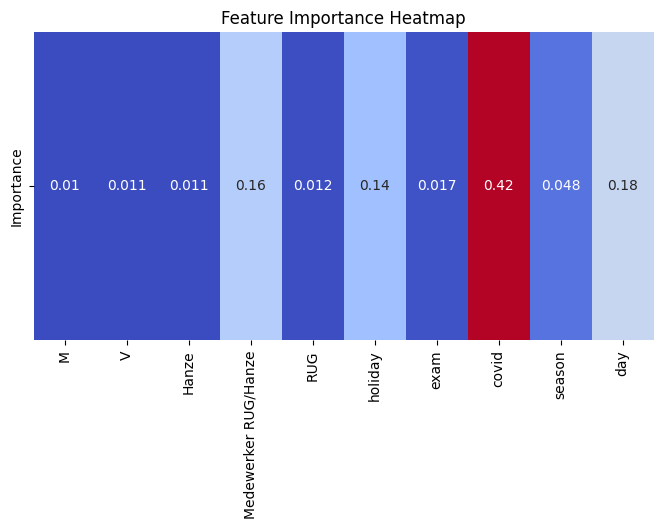

In [300]:
# Create Simple Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(importanceDF[['Importance']].T, annot=True, cmap='coolwarm', xticklabels=importanceDF['Feature'], cbar=False)
plt.title('Feature Importance Heatmap')
plt.show()

In [331]:
# Threshold based on 60th percentile
threshold = np.percentile(importance, 75)

selected = ["usage"]

# Select features above the threshold
selected.extend([feature for i, feature in enumerate(predictor) if importance[i] >= threshold])

print("Selected Features:", selected)

Selected Features: ['usage', 'Medewerker RUG/Hanze', 'covid', 'day']


In [332]:
filtered = datas[selected]

display(filtered.head())

,usage,Medewerker RUG/Hanze,covid,day
checkin_time,,,,
2017-08-01,145,1,0,5
2017-08-02,118,1,0,6
2017-08-03,128,1,0,4
2017-08-04,133,1,0,0
2017-08-05,0,0,0,2


## Normalization

### Original

In [322]:
datas.describe()

,M,V,Hanze,Medewerker RUG/Hanze,RUG,usage,holiday,exam,covid,season,day
count,1614.000000,1614.000000,1614.00000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,1.215613,1.207559,0.77943,0.774473,0.783767,182.913259,5.909542,0.214374,0.348823,1.451053,3.001859
std,0.412879,0.426543,0.41476,0.418058,0.411803,153.112797,1.120400,0.410515,0.476746,1.139287,2.001703
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.00000,1.000000,1.000000,36.000000,6.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.00000,1.000000,1.000000,163.000000,6.000000,0.000000,0.000000,1.000000,3.000000
75%,1.000000,1.000000,1.00000,1.000000,1.000000,304.000000,6.000000,0.000000,1.000000,2.000000,5.000000
max,2.000000,2.000000,1.00000,1.000000,1.000000,532.000000,8.000000,1.000000,1.000000,3.000000,6.000000


In [323]:
Y = datas["usage"]
X = datas.drop(columns=['usage'], axis=1)

In [324]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

In [325]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [326]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.5,0.5,1.0,1.0,1.0,0.875,0.0,0.0,0.666667,0.833333
1,0.5,0.5,1.0,1.0,1.0,0.875,0.0,0.0,0.666667,1.000000
2,0.5,0.5,1.0,1.0,1.0,0.875,0.0,0.0,0.666667,0.666667
3,0.5,0.5,1.0,1.0,1.0,0.875,0.0,0.0,0.666667,0.000000
4,1.0,1.0,0.0,0.0,0.0,0.875,0.0,0.0,0.666667,0.333333


In [327]:
Y.head()

,0
0,0.272556
1,0.221805
2,0.240602
3,0.250000
4,0.000000


### Feature Selected

In [333]:
filtered.describe()

,usage,Medewerker RUG/Hanze,covid,day
count,1614.000000,1614.000000,1614.000000,1614.000000
mean,182.913259,0.774473,0.348823,3.001859
std,153.112797,0.418058,0.476746,2.001703
min,0.000000,0.000000,0.000000,0.000000
25%,36.000000,1.000000,0.000000,1.000000
50%,163.000000,1.000000,0.000000,3.000000
75%,304.000000,1.000000,1.000000,5.000000
max,532.000000,1.000000,1.000000,6.000000


In [334]:
Y_filtered = filtered["usage"]
X_filtered = filtered.drop(columns=['usage'], axis=1)

In [335]:
X_filtered = scaler.fit_transform(X_filtered)
Y_filtered = scaler.fit_transform(Y_filtered.values.reshape(-1, 1))

In [336]:
X_filtered = pd.DataFrame(X_filtered)
Y_filtered = pd.DataFrame(Y_filtered)

In [337]:
X_filtered.head()

,0,1,2
0,1.0,0.0,0.833333
1,1.0,0.0,1.000000
2,1.0,0.0,0.666667
3,1.0,0.0,0.000000
4,0.0,0.0,0.333333


In [338]:
Y_filtered.head()

,0
0,0.272556
1,0.221805
2,0.240602
3,0.250000
4,0.000000


## Split Data into Train/Test sets

In [ ]:
from sklearn.model_selection import train_test_split

### Original

In [339]:
# initialized the train data (drop the unused data) and test/target data
train = datas.drop(['usage'],axis = 1)
test = datas['usage']

In [340]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

### Feature Selected

In [341]:
# initialized the train data (drop the unused data) and test/target data
train_filtered = filtered.drop(['usage'],axis = 1)
test_filtered = filtered['usage']

In [342]:
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = \
                                    train_test_split(train_filtered, test_filtered, test_size=0.3, random_state=2)

## Evaluation Metrics

In [343]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [344]:
def adjusted_r2(y_true, y_pred, n_features):
    """
    Calculates the adjusted R-squared.

    Args:
        y_true: Array of actual target values.
        y_pred: Array of predicted target values.
        n_features: Number of features in the model.

    Returns:
        Adjusted R-squared value.
    """
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)  # Number of observations
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return adjusted_r2

# Model

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.1958762886597938
Confusion Matrix:
[[95  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]


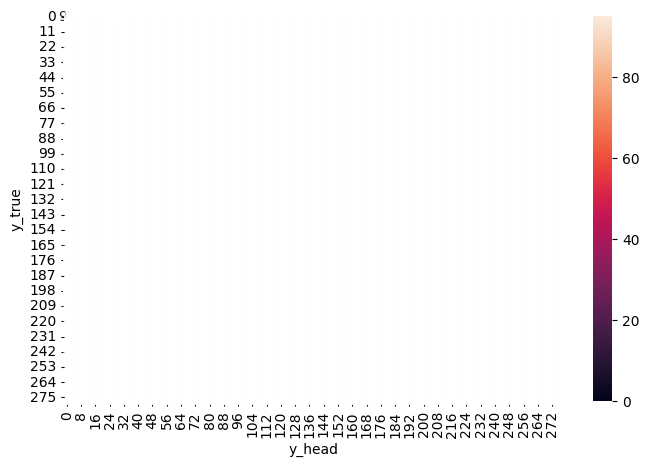

Classification Report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33        95
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         2
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         1
    

c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [113]:
logModel = LogisticRegression(max_iter=200)
logModel.fit(X_train, y_train)

# predict the target value using the train data
y_pred = logModel.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()
print('Classification Report:')
print(classification_report(y_test, y_pred))

In [114]:
#Evaluate model
def print_model_score(model_name, data_name, pred, target):
  print(model_name)
  print(data_name)
  print(classification_report(target,pred))
  print('acc = ',accuracy_score(target,pred))
  print('auc = ',roc_auc_score(target,pred))
  print('\n','-'*30,'\n')

In [115]:
#Train
lr_smote = LogisticRegression(C=10, class_weight='balanced')
lr_smote.fit(X_train, y_train)
#Test
pred_lr_smote_test = lr_smote.predict(X_test)
print_model_score('Logistic Regression (trained with SMOTE)', 'test data', pred_lr_smote_test, y_test)


c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\watas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.p

Logistic Regression (trained with SMOTE)
test data
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        95
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         0
          35       0.00      0

ValueError: multi_class must be in ('ovo', 'ovr')

# Linear Regression

# Random Forest

# XG Boost

# SVR

# Poisson Regression

# Decision Tree

# RNN